# OIBSIP Task 1: Unemployment Analysis Using Python

**Contributor: Naman Sahu**

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
# getting datasets

UnEmp = pd.read_csv('/content/drive/MyDrive/data/Oasis Infobyte/archive/Unemployment in India.csv')          #Unemployment data of india
UnEmp_2020 = pd.read_csv('/content/drive/MyDrive/data/Oasis Infobyte/archive/Unemployment_Rate_upto_11_2020.csv')  #Unemployment data during covid

UnEmp

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
UnEmp_2020

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


# Data Cleaning

In [9]:
UnEmp.shape

(768, 7)

In [10]:
UnEmp.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [25]:
new_UnEmp = UnEmp.head(754)
new_UnEmp

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [26]:
new_UnEmp.isnull().sum()

Region                                      14
 Date                                       14
 Frequency                                  14
 Estimated Unemployment Rate (%)            14
 Estimated Employed                         14
 Estimated Labour Participation Rate (%)    14
Area                                        14
dtype: int64

In [42]:
new_UnEmp.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [55]:
mode_value = new_UnEmp['Region'].mode()[0]
#df[column_name] = df[column_name].fillna(mode_value)
mode_value

'Andhra Pradesh'

Replacing null values with most occured value

In [56]:
new_UnEmp['Region']=new_UnEmp['Region'].fillna( new_UnEmp['Region'].mode()[0])
new_UnEmp['Region'].isnull().sum()

0

In [57]:
new_UnEmp[' Date']=new_UnEmp[' Date'].fillna( new_UnEmp[' Date'].mode()[0])
new_UnEmp[' Date'].isnull().sum()

0

In [58]:
new_UnEmp[' Frequency']=new_UnEmp[' Frequency'].fillna( new_UnEmp[' Frequency'].mode()[0])
new_UnEmp[' Frequency'].isnull().sum()

0

In [59]:
new_UnEmp['Area']=new_UnEmp['Area'].fillna( new_UnEmp['Area'].mode()[0])
new_UnEmp['Area'].isnull().sum()

0

In [60]:
new_UnEmp = new_UnEmp.fillna(new_UnEmp.mean())
new_UnEmp.isnull().sum()

<ipython-input-60-451567f35fd8>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_UnEmp = new_UnEmp.fillna(new_UnEmp.mean())


Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [64]:
UnEmp_2020.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [65]:
new_UnEmp.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,754.000000,7.540000e+02,754.000000
mean,11.787946,7.204460e+06,42.630122
std,10.621164,8.012449e+06,8.035339
min,0.000000,4.942000e+04,13.330000
25%,4.692500,1.227446e+06,38.167500
50%,8.625000,4.825595e+06,41.255000
75%,15.720000,1.116545e+07,45.390000
max,76.740000,4.577751e+07,72.570000


In [66]:
UnEmp_2020.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [67]:
new_UnEmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    754 non-null    object 
 1    Date                                     754 non-null    object 
 2    Frequency                                754 non-null    object 
 3    Estimated Unemployment Rate (%)          754 non-null    float64
 4    Estimated Employed                       754 non-null    float64
 5    Estimated Labour Participation Rate (%)  754 non-null    float64
 6   Area                                      754 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


In [68]:
UnEmp_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


# Data Visualisation

<ipython-input-69-abb3f5ca3b11>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_data = new_UnEmp.groupby('Region').sum()


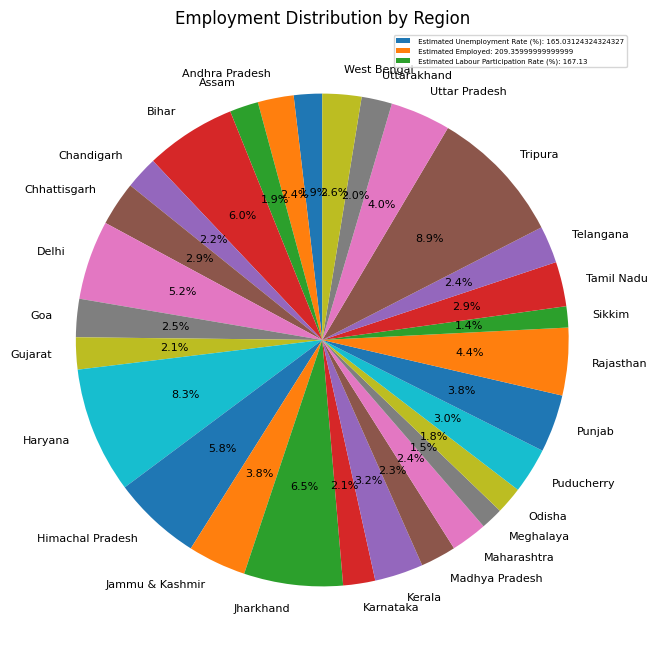

In [69]:
region_data = new_UnEmp.groupby('Region').sum()

fig, ax = plt.subplots(figsize=(20, 8))
ax.pie(region_data[' Estimated Unemployment Rate (%)'], labels=region_data.index, autopct='%1.1f%%', startangle=90,textprops={'fontsize':8})
ax.legend(loc='upper right', labels=[f'{l}: {s}' for l, s in zip(region_data, region_data[' Estimated Unemployment Rate (%)'])], prop={'size': 5})
ax.set_title('Employment Distribution by Region')
plt.show()

<ipython-input-71-43ae5b348788>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_data1 = UnEmp_2020.groupby('Region').sum()


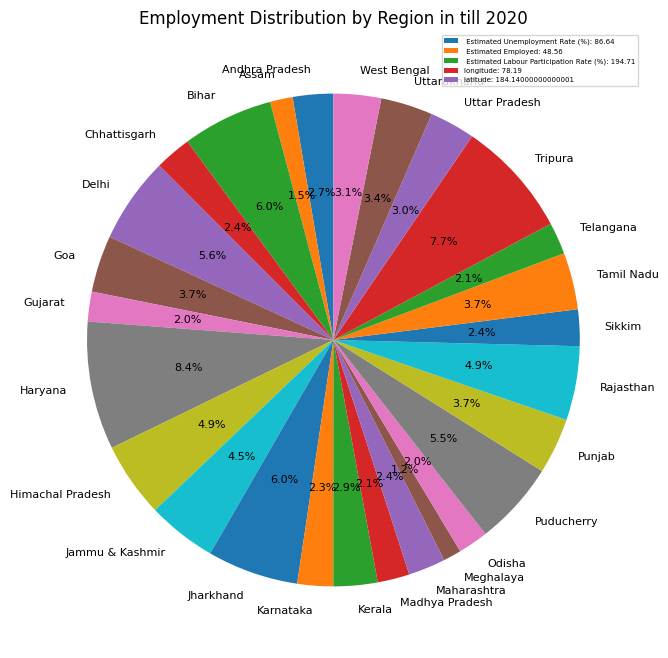

In [71]:
region_data1 = UnEmp_2020.groupby('Region').sum()

fig, ax = plt.subplots(figsize=(20, 8))
ax.pie(region_data1[' Estimated Unemployment Rate (%)'], labels=region_data1.index, autopct='%1.1f%%', startangle=90,textprops={'fontsize':8})
ax.legend(loc='upper right', labels=[f'{l}: {s}' for l, s in zip(region_data1, region_data1[' Estimated Unemployment Rate (%)'])], prop={'size': 5})
ax.set_title('Employment Distribution by Region in till 2020')
plt.show()

In [73]:
x_regions = np.array(new_UnEmp['Region'])
x_regions_cov = np.array(UnEmp_2020['Region'])
y_unp = np.array(new_UnEmp[' Estimated Labour Participation Rate (%)'])
y_unp_covid = np.array(UnEmp_2020[' Estimated Labour Participation Rate (%)'])

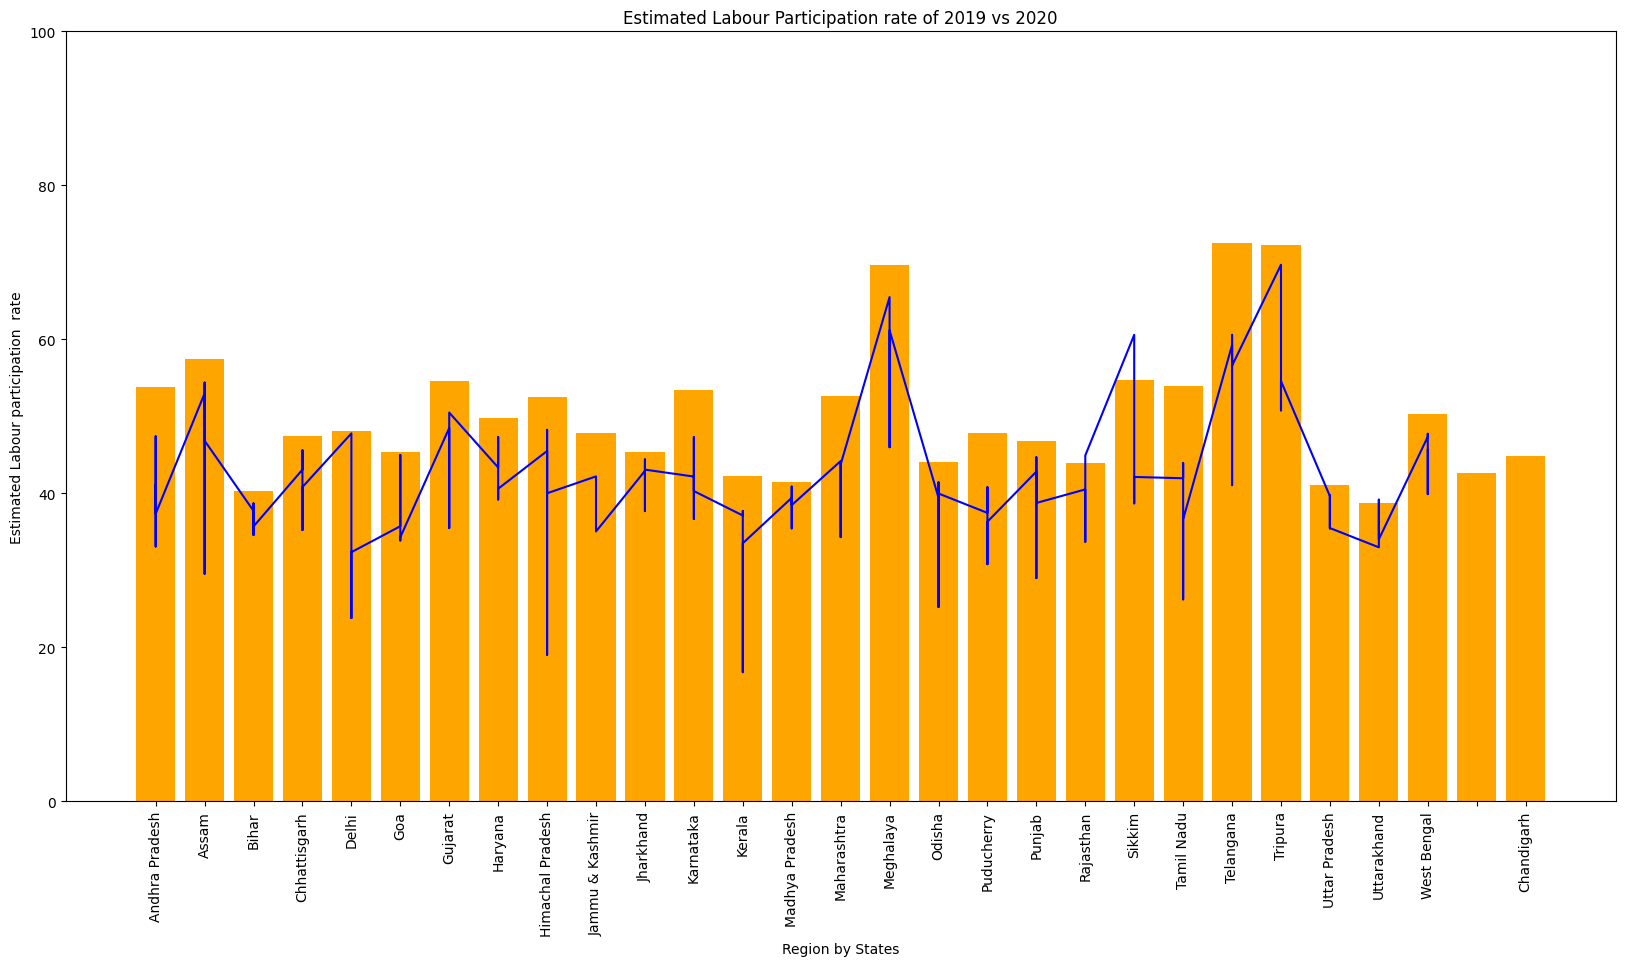

In [74]:
fig = plt.figure(figsize=(20, 10))

plt.bar(x_regions, y_unp, color= 'orange')
plt.plot(x_regions_cov, y_unp_covid, color= 'blue')
plt.ylim(0, 100)

labels = sorted(set(new_UnEmp['Region']))
plt.xticks(labels, rotation='vertical')

plt.xlabel('Region by States')
plt.ylabel('Estimated Labour participation  rate')
plt.title('Estimated Labour Participation rate of 2019 vs 2020')

plt.show()

<ipython-input-75-5905382d834b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Heat_maps = Heat_maps.corr()


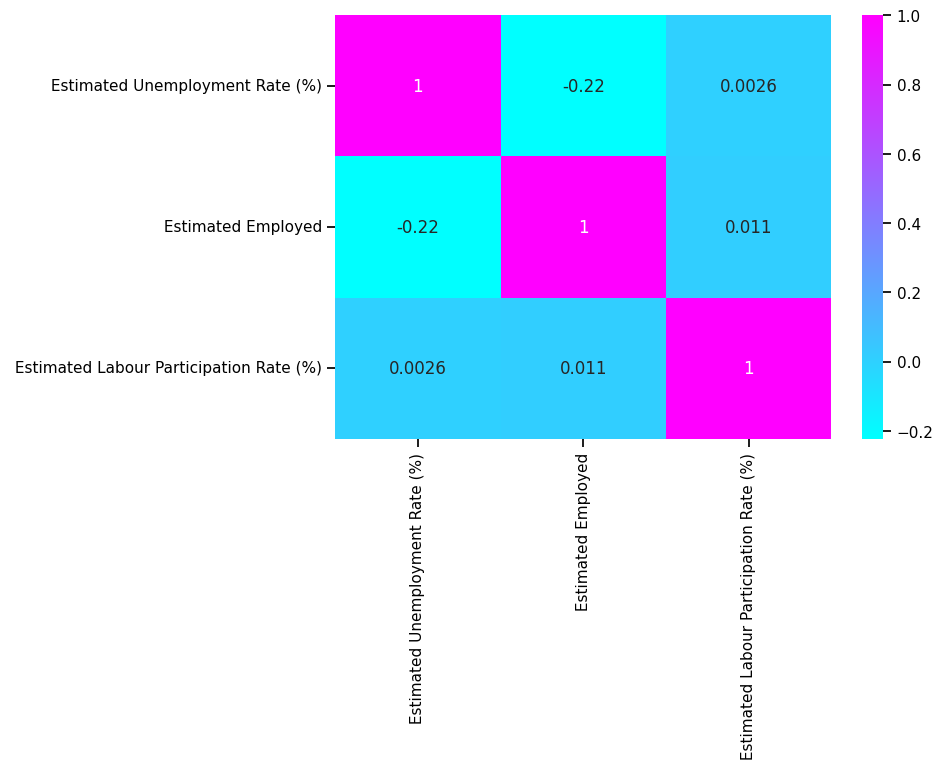

In [75]:
Heat_maps = new_UnEmp[['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area']]

Heat_maps = Heat_maps.corr()

plt.figure(figsize=(8,5.5))
sns.set_context('notebook',font_scale=1)
sns.heatmap(Heat_maps, annot=True,cmap="cool");

<ipython-input-76-75fce605bc15>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = new_UnEmp.groupby(["Region", " Date"]).sum()


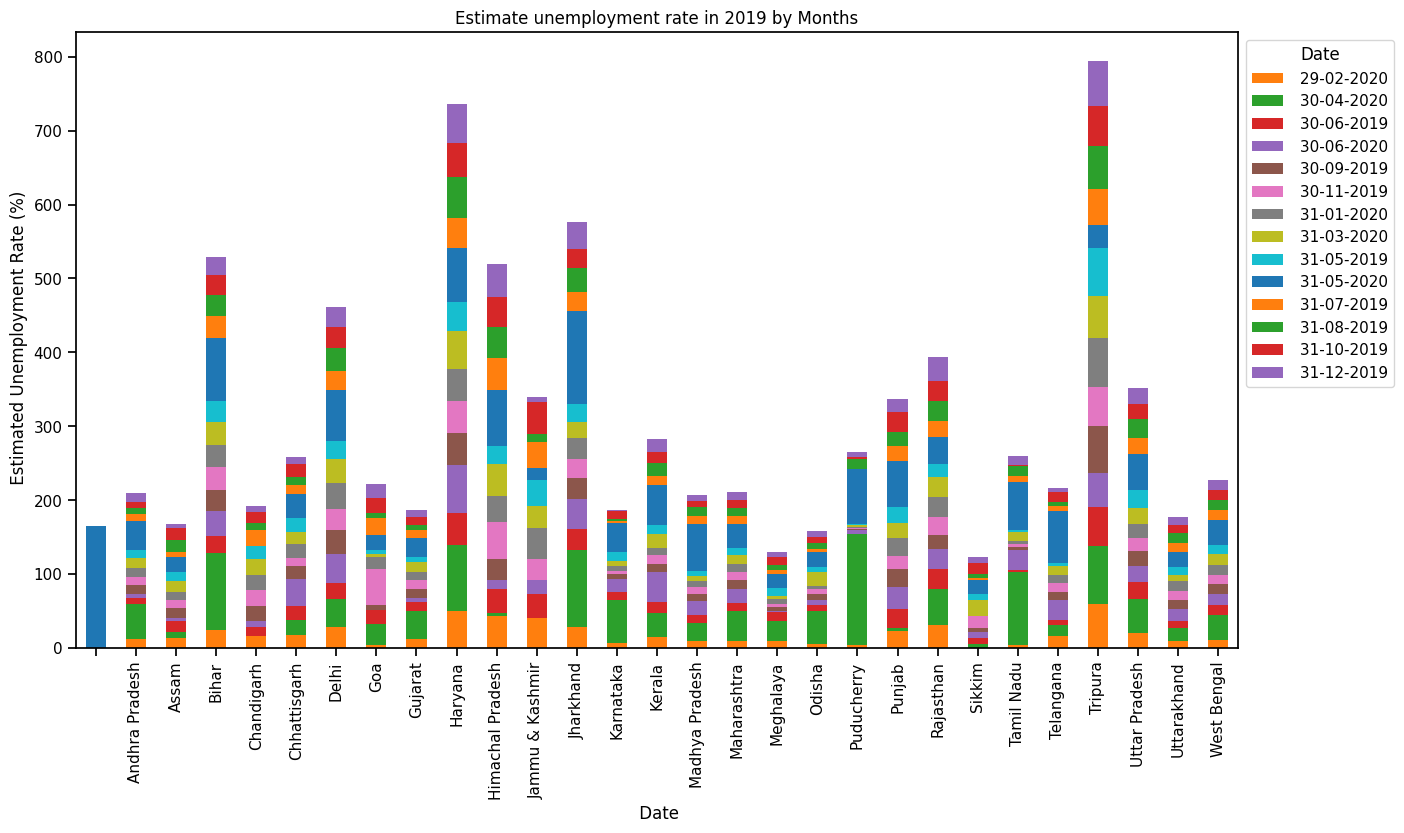

In [76]:
# Group data by region and date
grouped_df = new_UnEmp.groupby(["Region", " Date"]).sum()

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(15,8))
grouped_df[" Estimated Unemployment Rate (%)"].unstack().plot.bar(stacked=True, ax=ax)

# Label the plot
ax.set_ylabel(" Estimated Unemployment Rate (%)")
ax.set_xlabel(" Date")
plt.title('Estimate unemployment rate in 2019 by Months')

# Arrange legend to the right upper corner
ax.legend(title="Date", loc='upper left', bbox_to_anchor=(1,1))

# Show plot
plt.show()

<ipython-input-77-8181b99bb176>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df1 = UnEmp_2020.groupby(["Region", " Date"]).sum()


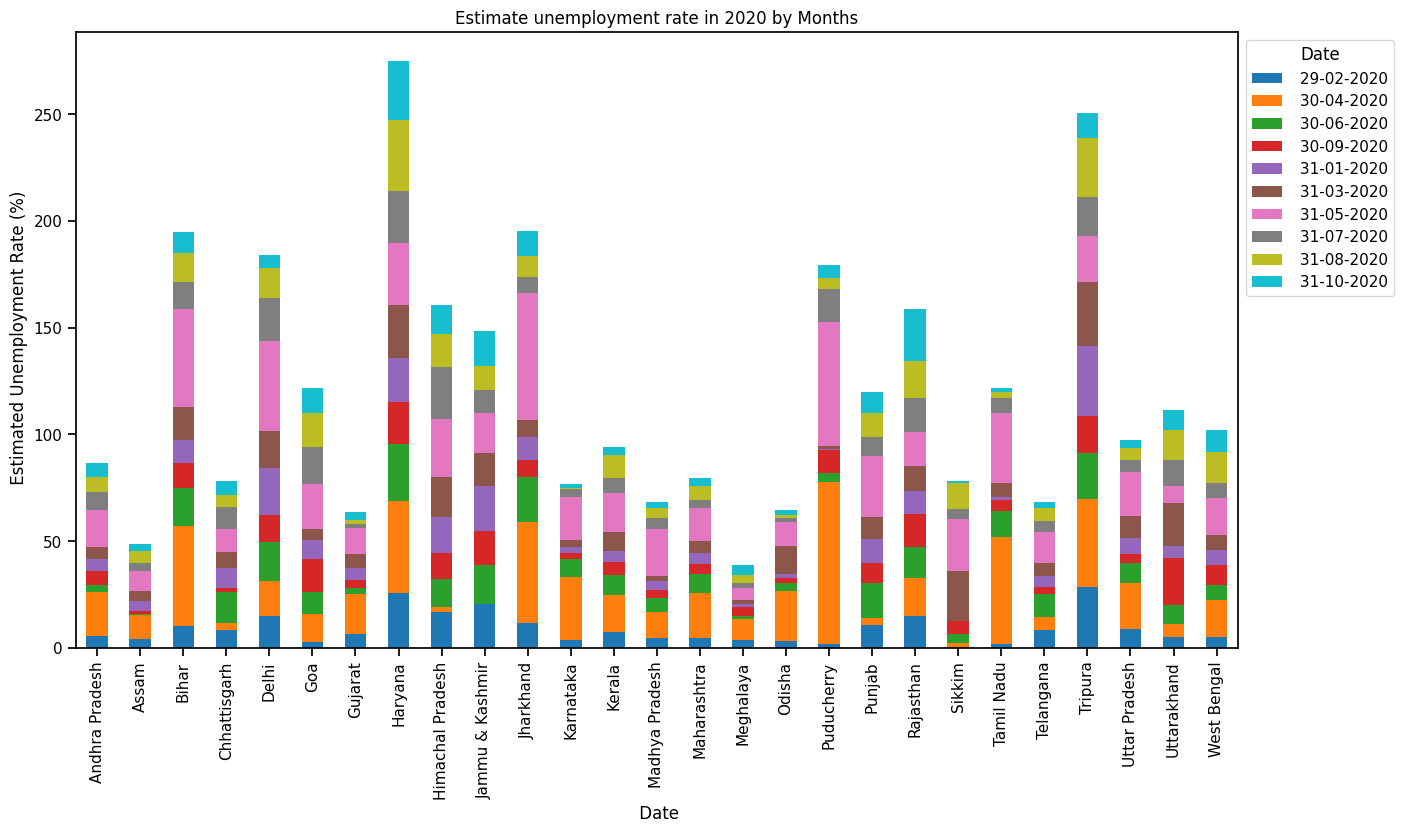

In [77]:
# Group data by region and date
grouped_df1 = UnEmp_2020.groupby(["Region", " Date"]).sum()

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(15,8))
grouped_df1[" Estimated Unemployment Rate (%)"].unstack().plot.bar(stacked=True, ax=ax)

# Label the plot
ax.set_ylabel(" Estimated Unemployment Rate (%)")
ax.set_xlabel(" Date")
plt.title('Estimate unemployment rate in 2020 by Months')

# Arrange legend to the right upper corner
ax.legend(title="Date", loc='upper left', bbox_to_anchor=(1,1))

# Show plot
plt.show()

[Text(0, 0, 'Andhra Pradesh'),
 Text(1, 0, 'Assam'),
 Text(2, 0, 'Bihar'),
 Text(3, 0, 'Chhattisgarh'),
 Text(4, 0, 'Delhi'),
 Text(5, 0, 'Goa'),
 Text(6, 0, 'Gujarat'),
 Text(7, 0, 'Haryana'),
 Text(8, 0, 'Himachal Pradesh'),
 Text(9, 0, 'Jammu & Kashmir'),
 Text(10, 0, 'Jharkhand'),
 Text(11, 0, 'Karnataka'),
 Text(12, 0, 'Kerala'),
 Text(13, 0, 'Madhya Pradesh'),
 Text(14, 0, 'Maharashtra'),
 Text(15, 0, 'Meghalaya'),
 Text(16, 0, 'Odisha'),
 Text(17, 0, 'Puducherry'),
 Text(18, 0, 'Punjab'),
 Text(19, 0, 'Rajasthan'),
 Text(20, 0, 'Sikkim'),
 Text(21, 0, 'Tamil Nadu'),
 Text(22, 0, 'Telangana'),
 Text(23, 0, 'Tripura'),
 Text(24, 0, 'Uttar Pradesh'),
 Text(25, 0, 'Uttarakhand'),
 Text(26, 0, 'West Bengal')]

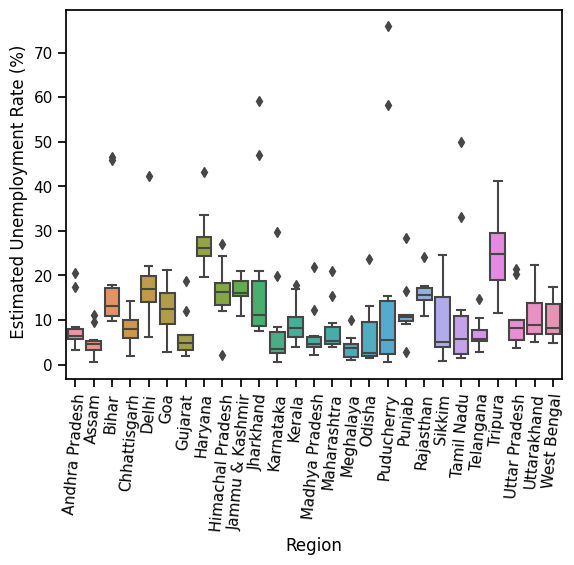

In [78]:
g=sns.boxplot(data=UnEmp_2020, x='Region', y=' Estimated Unemployment Rate (%)')
g.set_xticklabels(g.get_xticklabels(), rotation=85)

# **Thank You**